In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DeforestationSDG datassset/goal15.forest_shares.csv')

In [3]:
data.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         237 non-null    object 
 1   forests_2000  237 non-null    float64
 2   forests_2020  237 non-null    float64
 3   trend         227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


Most Forest Coverage Countries in 2020 vs 2000 | Deforestation Trend

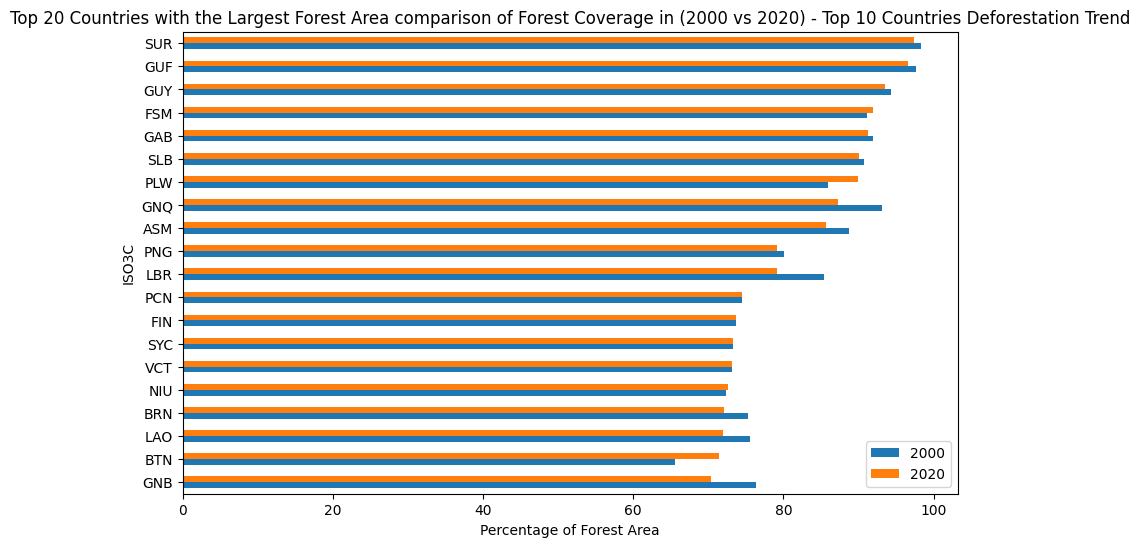

In [9]:
top_20 = data.nlargest(20, 'forests_2020')
top_20 = top_20[::-1]
top_20.plot(x='iso3c', y=['forests_2000', 'forests_2020'], kind='barh', figsize=(10, 6))
plt.xlabel('Percentage of Forest Area')
plt.ylabel('ISO3C')
plt.title('Top 20 Countries with the Largest Forest Area comparison of Forest Coverage in (2000 vs 2020) - Top 10 Countries Deforestation Trend')
plt.legend(['2000', '2020'])
plt.show()

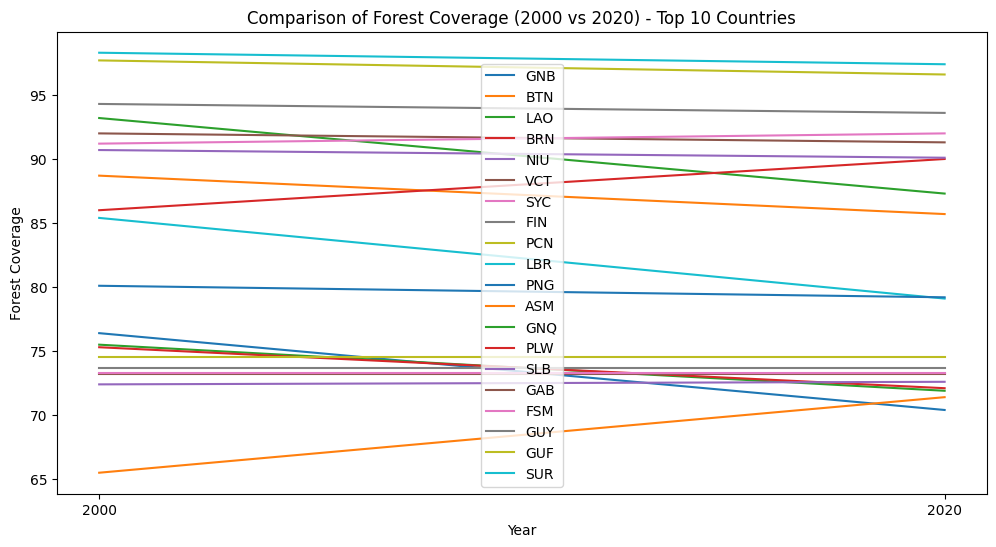

In [11]:
plt.figure(figsize=(12, 6))
for country in top_20['iso3c']:
    plt.plot(['2000', '2020'], [data[data['iso3c'] == country]['forests_2000'].values[0],
                                data[data['iso3c'] == country]['forests_2020'].values[0]],
             label=country)

plt.xlabel('Year')
plt.ylabel('Forest Coverage')
plt.title('Comparison of Forest Coverage (2000 vs 2020) - Top 10 Countries')
plt.legend()
plt.show()

Training model to predict Trend

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb

In [15]:
X = data[['forests_2000', 'forests_2020']]
y = data['trend']

In [16]:
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))

In [17]:
X

,forests_2000,forests_2020
0,1.9,1.9
1,28.1,28.8
2,0.7,0.8
3,88.7,85.7
4,34.0,34.0
...,...,...
232,2.5,2.5
233,31.9,31.2
234,1.0,1.0
235,63.3,60.3


In [18]:
len(y)

237

In [19]:
y

array([[   0.        ],
       [   2.5       ],
       [  14.3       ],
       [  -3.4       ],
       [   0.        ],
       [ -14.3       ],
       [   0.        ],
       [ -14.        ],
       [ -14.8       ],
       [  -1.7       ],
       [   0.        ],
       [   1.2       ],
       [   1.7       ],
       [  14.2       ],
       [   0.        ],
       [  80.        ],
       [  -2.        ],
       [   0.        ],
       [   5.9       ],
       [   3.6       ],
       [ -12.5       ],
       [ -24.3       ],
       [   0.        ],
       [   9.        ],
       [  -7.9       ],
       [   0.        ],
       [   3.6       ],
       [ -13.5       ],
       [  -9.9       ],
       [  -1.6       ],
       [  -4.2       ],
       [  17.7       ],
       [ -14.        ],
       [  43.4       ],
       [  14.1       ],
       [ -25.2       ],
       [  -5.9       ],
       [  -0.3       ],
       [  -1.7       ],
       [  -2.7       ],
       [ -32.        ],
       [  15.   

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

Testing out different models

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
}

Results for Linear Regression:
Mean Squared Error: 55.558727810038796
R-squared Score: 0.6741237019520376


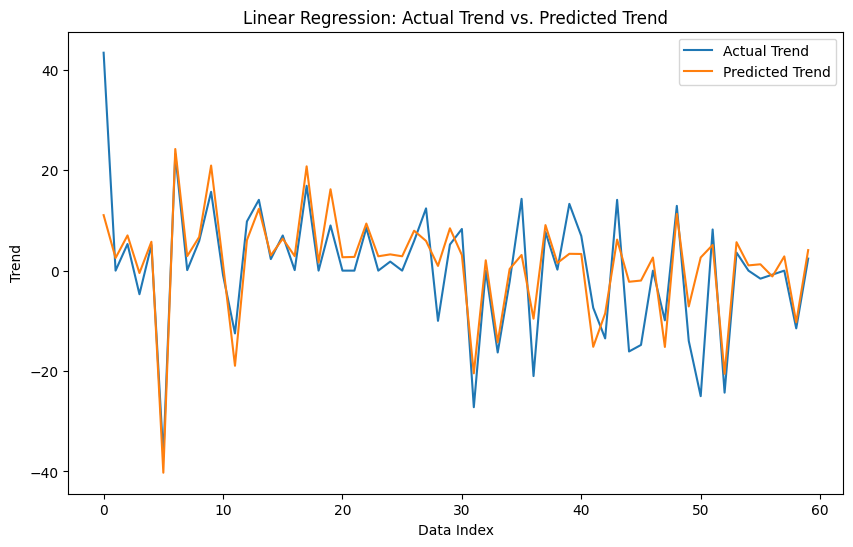


Results for Decision Tree:
Mean Squared Error: 211.68483333333336
R-squared Score: -0.24162435964025386


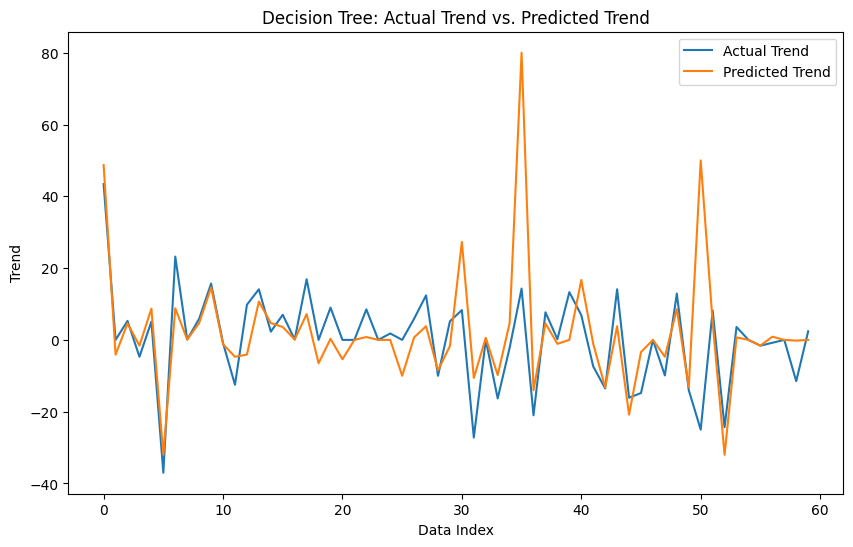


Results for Random Forest:
Mean Squared Error: 153.85325801666673
R-squared Score: 0.09758318555252865


c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


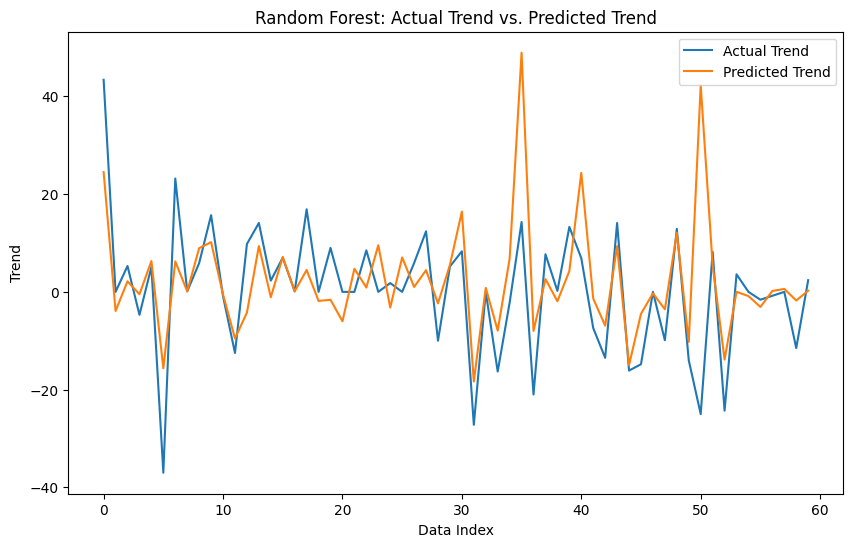


Results for SVR:
Mean Squared Error: 161.24851245952
R-squared Score: 0.05420677583343658


c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


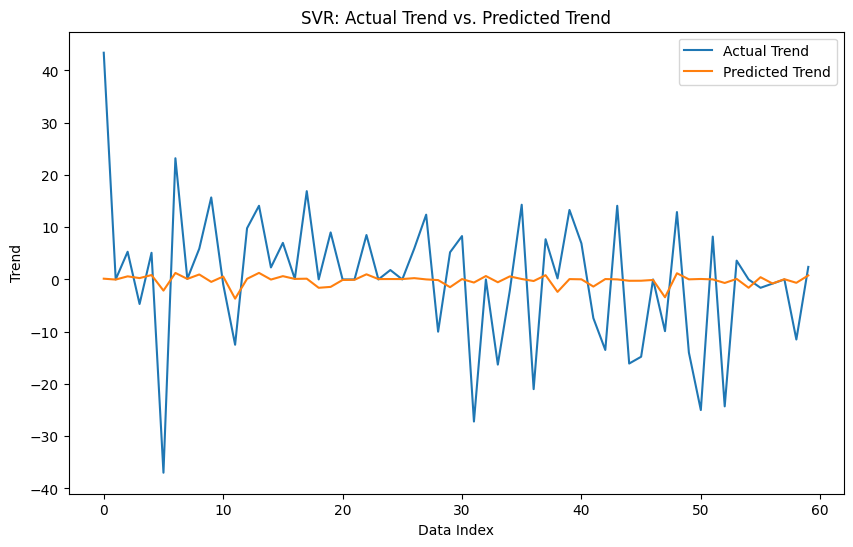


Results for XGBoost:
Mean Squared Error: 107.69211401855985
R-squared Score: 0.36833853422060836


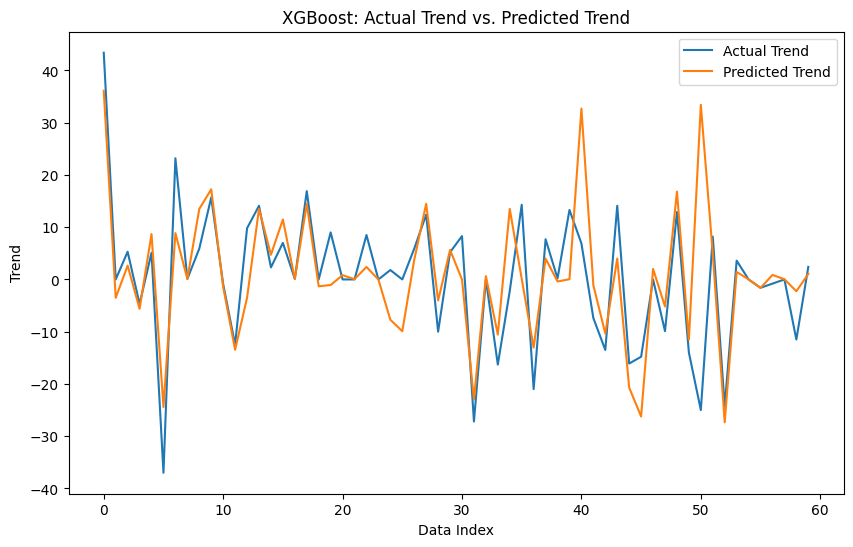


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 2
[LightGBM] [Info] Start training from score 0.067451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\lightgbm\basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


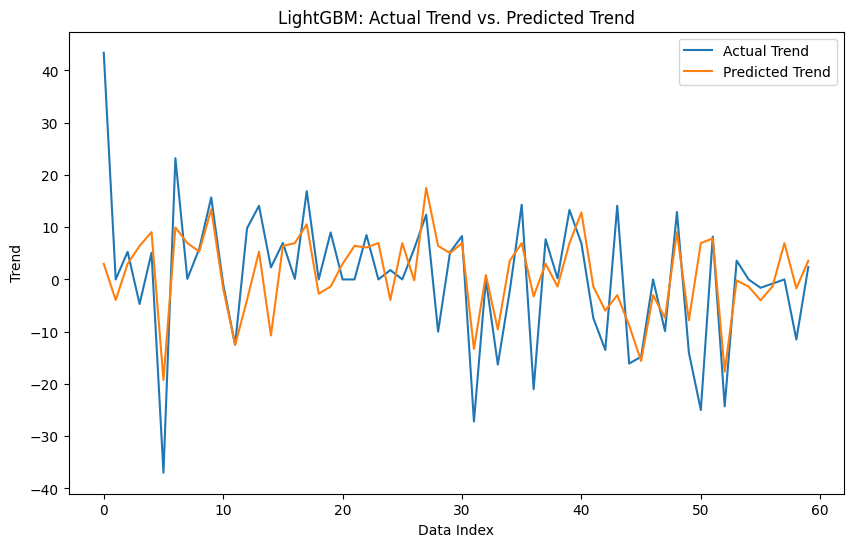

c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Results for Gradient Boosting Regressor:
Mean Squared Error: 177.52605287366399
R-squared Score: -0.04126813550045627


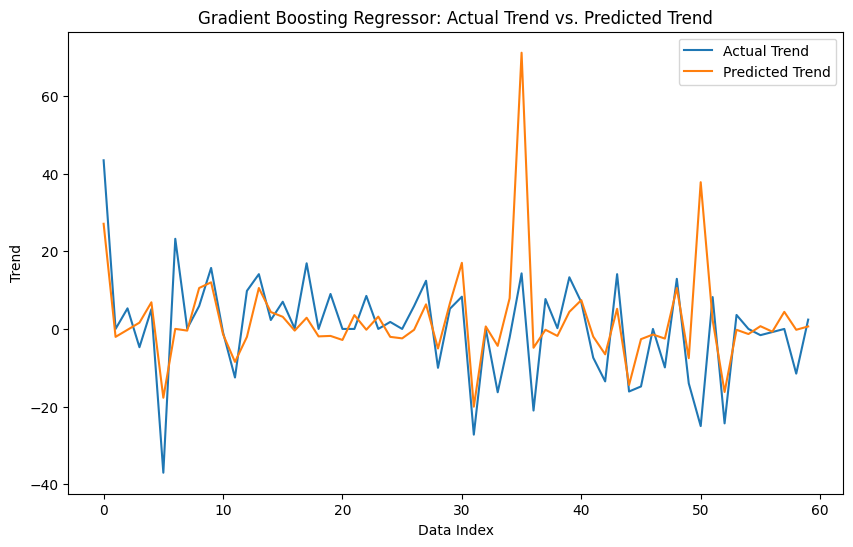

c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for ADA Boost:
Mean Squared Error: 221.57242548561274
R-squared Score: -0.29961942277794296


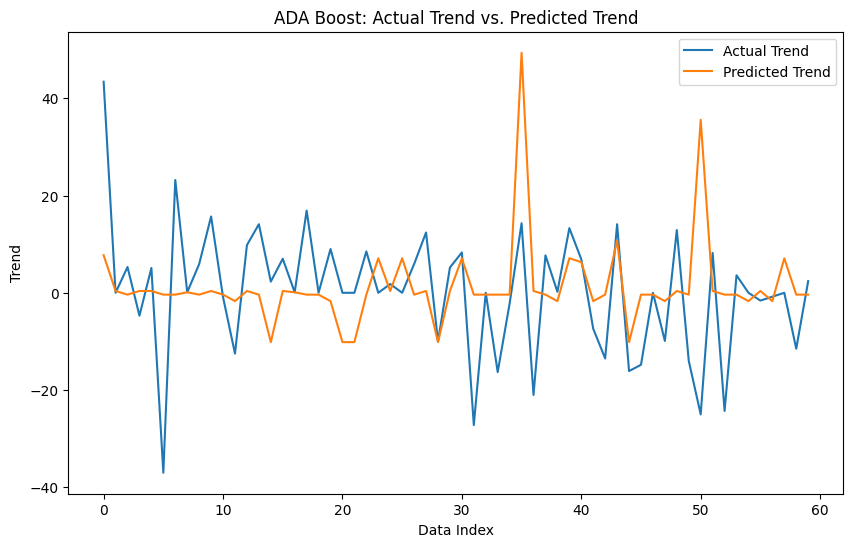


Results for K Neighbors Regressor:
Mean Squared Error: 138.00566666666663
R-squared Score: 0.19053625711623368


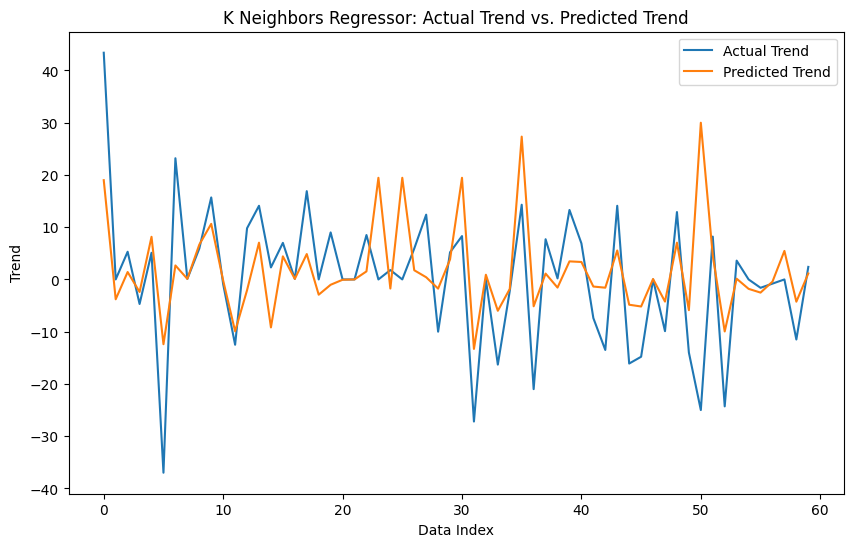


Results for Linear SVR:
Mean Squared Error: 61.24879284183421
R-squared Score: 0.6407489757604381


c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


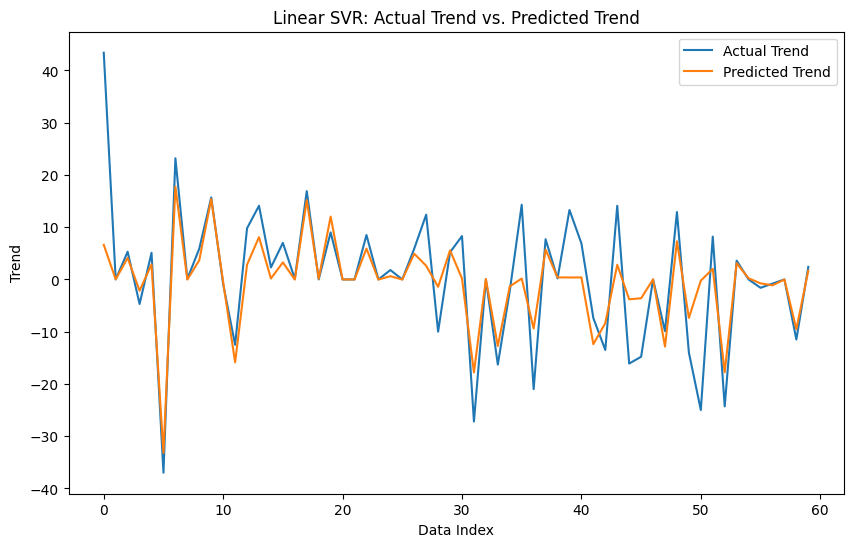

In [22]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()

Accuracy of the models

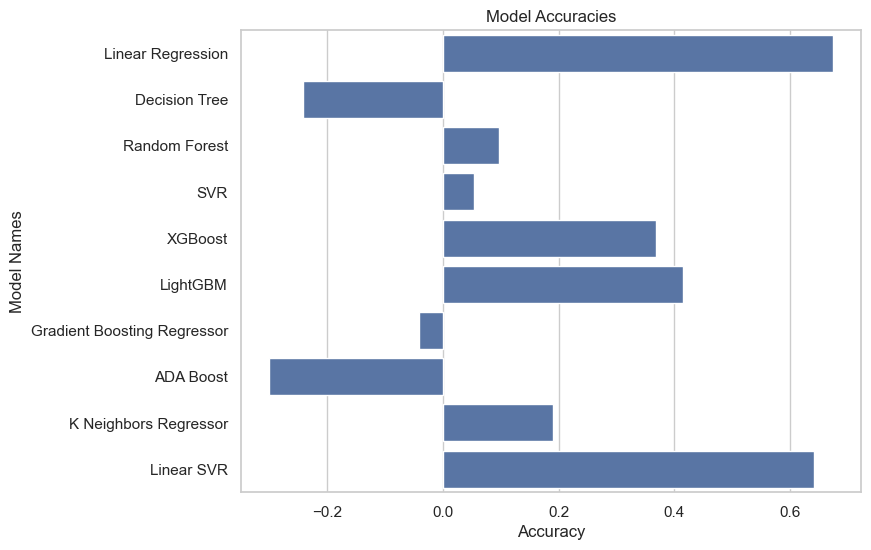

In [28]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()